In [1]:
import pandas as pd
import random

# Create sample data
products = ["Sabu T-Shirt", "Sabu Figure", "Sabu Hoodie", "Sabu Cap"]
genders = ["Male", "Female", "Non-Binary"]
income_levels = ["Low", "Medium", "High"]

data = []
for i in range(1, 501):  # 500 simulated purchases
    product = random.choice(products)
    price = round(random.uniform(15, 60), 2)
    cost = round(price * random.uniform(0.4, 0.7), 2)
    profit = round(price - cost, 2)
    
    record = {
        "OrderID": f"O{i:04d}",
        "ProductType": product,
        "Price": price,
        "Cost": cost,
        "Profit": profit,
        "Quantity": random.randint(1, 4),
        "Age": random.randint(16, 65),
        "Gender": random.choice(genders),
        "IncomeBracket": random.choice(income_levels),
        "Location": random.choice(["North", "South", "East", "West", "Central"])
    }
    data.append(record)

df = pd.DataFrame(data)
df.head()

,OrderID,ProductType,Price,Cost,Profit,Quantity,Age,Gender,IncomeBracket,Location
0,O0001,Sabu Figure,29.47,17.36,12.11,3,23,Male,High,East
1,O0002,Sabu Cap,47.47,22.80,24.67,4,41,Female,Low,North
2,O0003,Sabu Figure,35.15,14.30,20.85,1,60,Non-Binary,High,North
3,O0004,Sabu Figure,29.67,17.94,11.73,2,33,Non-Binary,Low,North
4,O0005,Sabu Figure,18.18,7.54,10.64,4,49,Female,High,South


In [2]:
df.to_csv("sabu_merch_sales.csv", index=False)

In [3]:
total_sales = df["Price"].sum()
total_profit = df["Profit"].sum()

print(f"Total Sales: £{total_sales:.2f}")
print(f"Total Profit: £{total_profit:.2f}")

Total Sales: £19051.99
Total Profit: £8485.03


In [4]:
total_sales = df["Price"].sum()
total_profit = df["Profit"].sum()

print(f"Total Sales: £{total_sales:.2f}")
print(f"Total Profit: £{total_profit:.2f}")

Total Sales: £19051.99
Total Profit: £8485.03


In [5]:
profit_margin = df.groupby("ProductType").agg({
    "Price": "sum",
    "Profit": "sum"
})
profit_margin["ProfitMargin(%)"] = (profit_margin["Profit"] / profit_margin["Price"]) * 100
profit_margin

,Price,Profit,ProfitMargin(%)
ProductType,,,
Sabu Cap,4964.01,2208.32,44.486615
Sabu Figure,4435.80,2004.58,45.190946
Sabu Hoodie,4617.92,2074.69,44.926937
Sabu T-Shirt,5034.26,2197.44,43.649712


In [6]:
df["Age"].describe()

count    500.000000
mean      40.542000
std       14.284549
min       16.000000
25%       29.000000
50%       40.000000
75%       53.000000
max       65.000000
Name: Age, dtype: float64

<Axes: title={'center': 'Buyer Gender Distribution'}, xlabel='Gender'>

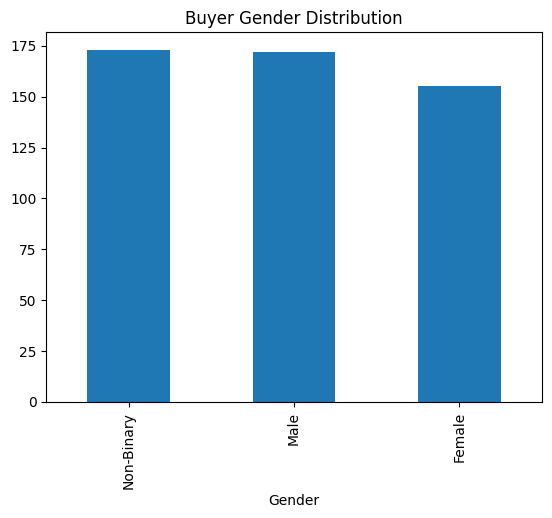

In [7]:
gender_counts = df["Gender"].value_counts()
gender_counts.plot(kind="bar", title="Buyer Gender Distribution")

<Axes: title={'center': 'Sales by Income Bracket'}, ylabel='Price'>

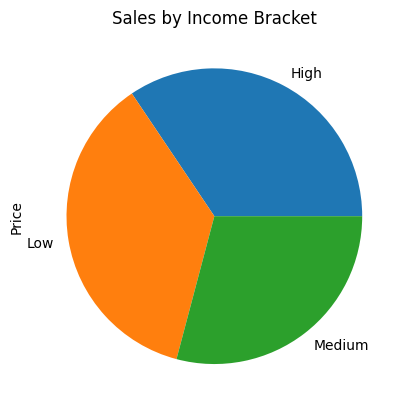

In [8]:
income_sales = df.groupby("IncomeBracket")["Price"].sum()
income_sales.plot(kind="pie", title="Sales by Income Bracket")

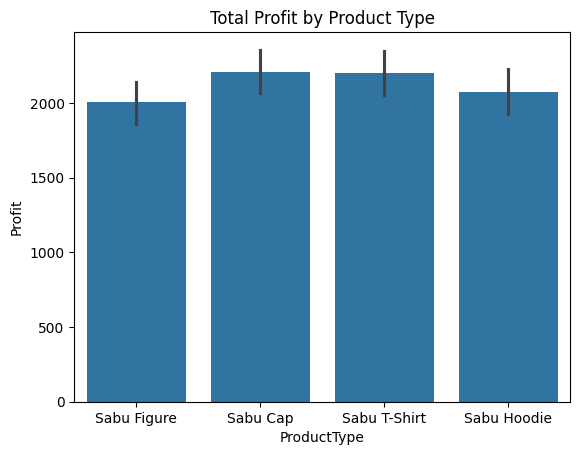

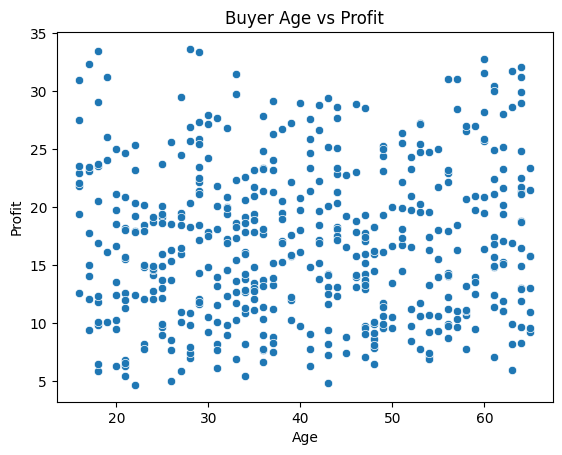

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Profit by Product Type
sns.barplot(x="ProductType", y="Profit", data=df, estimator=sum)
plt.title("Total Profit by Product Type")
plt.show()

# Age vs Profit
sns.scatterplot(x="Age", y="Profit", data=df)
plt.title("Buyer Age vs Profit")
plt.show()